In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
data = wb.DataReader('PETR4.SA', data_source='yahoo', start='2000-1-1')

In [20]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-13,26.389999,25.639999,25.799999,26.230000,63317900.0,26.230000
2021-09-14,26.250000,25.719999,25.950001,25.879999,65497300.0,25.879999
2021-09-15,26.459999,25.870001,26.000000,26.330000,67274100.0,26.330000
2021-09-16,26.240000,25.510000,26.080000,26.100000,65567700.0,26.100000
2021-09-17,26.020000,24.770000,25.969999,24.930000,131694100.0,24.930000


In [4]:
db = wb.get_data_yahoo('VALE3.SA', start='2000-1-1', interval="m")

In [5]:
db['avg'] = (db.Open + db.Close) / 2

In [6]:
db.head().round(2)

,High,Low,Open,Close,Volume,Adj Close,avg
Date,,,,,,,
2000-02-01,4.37,3.40,3.92,3.40,19968000.0,2.00,3.66
2000-03-01,3.42,2.75,3.40,3.33,32337600.0,1.96,3.37
2000-04-01,3.42,2.92,3.32,3.33,34152000.0,1.96,3.32
2000-05-01,3.54,3.17,3.33,3.48,37286400.0,2.05,3.41
2000-06-01,3.83,3.33,3.42,3.75,32232000.0,2.21,3.58


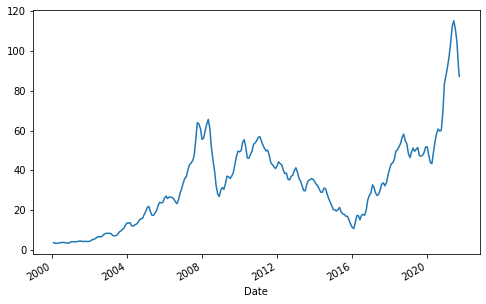

In [7]:
db['avg'].plot(figsize=(8,5))
plt.show()

In [13]:
df = pd.DataFrame(db)

In [15]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
data = pd.DataFrame(data)

In [9]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5454.000000,5454.000000,5454.000000,5454.000000,5.454000e+03,5454.000000
mean,18.633372,18.071045,18.364639,18.334043,5.878255e+08,13.878502
std,9.597592,9.282821,9.451689,9.415568,4.046711e+09,7.449995
min,4.270000,4.120000,4.200000,4.200000,0.000000e+00,2.679714
25%,9.900000,9.530000,9.701563,9.690000,2.060175e+07,6.880135
50%,18.775001,18.160000,18.450001,18.415000,3.227350e+07,14.106649
75%,25.190001,24.400000,24.750000,24.767500,5.167690e+07,19.269731
max,67.500000,51.950001,67.500000,52.509998,7.356416e+10,36.098499


In [6]:
data = data.dropna()

In [7]:
data['Resultado'] = (data['Adj Close'] / data['Adj Close'].shift(1))-1 #diferença entre o fechamento do dia e o dia anterior

In [13]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Resultado
Date,,,,,,,
2021-08-31,28.230000,26.990000,28.200001,27.190001,110574300.0,27.190001,-0.039223
2021-09-01,27.340000,26.330000,27.320000,27.040001,69430400.0,27.040001,-0.005517
2021-09-02,27.350000,26.459999,27.000000,26.600000,56052000.0,26.600000,-0.016272
2021-09-03,26.780001,26.100000,26.650000,26.330000,58182700.0,26.330000,-0.010150
2021-09-06,26.709999,26.150000,26.209999,26.459999,26770700.0,26.459999,0.004937


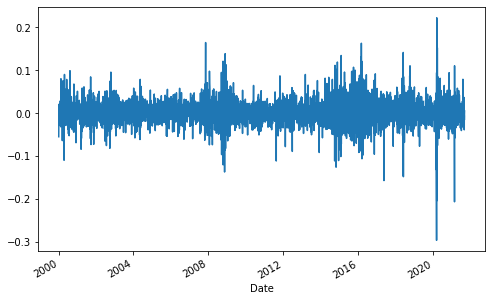

In [9]:
data['Resultado'].plot(figsize=(8,5))
plt.show()

In [10]:
media_simples = data['Resultado'].mean() * 250
print(media_simples)

0.18329690209208716


In [14]:
base_treino = data.iloc[:, 1:2].values

In [15]:
len(base_treino)

5446

In [17]:
base_treino

array([[ 5.875     ],
       [ 5.55000019],
       [ 5.49399996],
       ...,
       [26.45999908],
       [26.10000038],
       [26.14999962]])